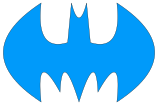

In [13]:
using Plots
gadfly(leg = false, grid = false, xticks = nothing, yticks = nothing)

function make_batman()
    p = P2[(0,0), (0.5, 0.2), (1, 0), (1,2),  (0.3,1.2), (0.2,2), (0,1.7)]
    m = P2[(p[i]+p[i+1])/2 for i=1:length(p)-1]
    m += P2[(0.2, 1), (0.4, 1), (2, 0), (0.5, -0.6), (0,0), (0,-0.15)]

    pts = P2[]
    for (i,mi) in enumerate(m)
        append!(pts, curve_points(BezierCurve(P2[p[i], m[i], p[i+1]])))
    end
    x, y = Plots.unzip(pts)
    Shape(vcat(x, -reverse(x)), vcat(y, reverse(y)))
end
plot(make_batman())

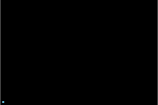

In [14]:
# background and limits
plt = plot(bg = :black, xlim = (0.1,0.9), ylim = (0.2,1.5))

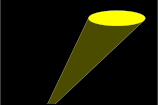

In [15]:
# create an ellipse in the sky
pts = Plots.partialcircle(0,2π,100,0.1)
x, y = Plots.unzip(pts)
x = 1.5x + 0.7
y += 1.3
pts = collect(zip(x, y))

# beam
beam = Shape([(0.3, 0.0), pts[95], pts[50]])
plot!(beam, m=(:yellow,0.3))

# spotlight
plot!(Shape(x,y), c=:yellow)

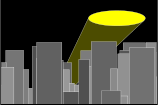

In [16]:
# buildings
rect(w, h, x, y) = Shape(x + [0,w,w,0], y + [0,0,h,h])
gray(pct) = RGB(pct,pct,pct)

for i=1:50
    shape = rect(0.1rand()+0.05, rand(), rand(), 0)
    plot!(shape, c = gray(0.3rand()+0.3))
end
plt

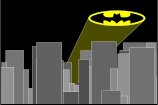

In [17]:
# Holy plotting, Batman!
batman = Plots.scale(make_batman(), 0.07)
batman = Plots.translate(batman, 0.7, 1.23)
plot!(batman, marker = (:black, stroke(0)))

In [18]:
png(Pkg.dir("ExamplePlots", "docs", "examples", "img", "batman"))